# Task 2: Predictive Modeling with Aviation Dataset

Objective:
Create a predictive model based on the Aviation dataset to forecast a chosen outcome. Interns can select any one of the columns/features as the target variable for prediction. Also, document and present the steps while building that model.


#### Columns/Features:

1. Event.Id
2. Investigation.Type
3. Accident.Number
4. Event.Date
5. Location
6. Country
7. Latitude
8. Longitude
9. Airport.Code
10. Airport.Name
11. Injury.Severity
12. Aircraft.damage
13. Aircraft.Category
14. Registration.Number
15. Make
16. Model
17. Amateur.Built
18. Number.of.Engines
19. Engine.Type
20. FAR.Description
21. Schedule
22. Purpose.of.flight
23. Air.carrier
24. Total.Fatal.Injuries
25. Total.Serious.Injuries
26. Total.Minor.Injuries
27. Total.Uninjured
28. Weather.Condition
29. Broad.phase.of.flight
30. Report.Status
31. Publication.Date


#### Importing Packages

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import re

/home/supriya/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
file_path = '/home/supriya/Desktop/FDV/aviation_prediction/AviationData.csv'

In [6]:
data = pd.read_csv(file_path, encoding='latin1')

/tmp/ipykernel_4507/2604165213.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, encoding='latin1')


In [7]:
data.sample(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
18507,20001213X31696,Accident,ANC87LA133,1987-08-24,"CENTRAL, AK",United States,NaN,NaN,CEM,CENTRAL,Non-Fatal,Substantial,NaN,N8507E,Champion,7GC,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,02-05-1988
79780,20170418X01152,Accident,ERA17FA156,2017-04-18,"East Windsor, CT",United States,415559N,0723357W,7B6,Skylark Airpark,Fatal,Substantial,Airplane,N8554Y,LUSCOMBE,8,N,1.0,Reciprocating,091,NaN,Personal,NaN,2.0,0.0,0.0,0.0,VMC,NaN,The flying pilot's excessive maneuvering of th...,25-09-2020
49653,20001212X22326,Accident,NYC01LA029,2000-11-02,"PROSPERITY, PA",United States,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,NaN,N35241,Cessna,177B,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,0.0,0.0,2.0,0.0,VMC,Maneuvering,Probable Cause,14-11-2001
1913,20020917X03354,Accident,FTW82DA278,1982-07-11,"MCKINNEY, TX",United States,NaN,NaN,NaN,LAUON NORTH,Non-Fatal,Substantial,Airplane,N5429B,Cessna,182,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Unknown,NaN,0.0,0.0,1.0,0.0,VMC,Landing,Probable Cause,11-07-1983
83860,20190909X81218,Accident,GAA19CA530,2019-09-01,"Chickaloon, AK",United States,614023N,1483249W,NaN,NaN,Non-Fatal,Substantial,Airplane,N72842,Piper,PA 18,N,1.0,Reciprocating,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,The pilot's selection of unsuitable terrain fo...,26-09-2020
33208,20001211X12744,Accident,ANC93LA113,1993-07-08,"ANCHORAGE, AK",United States,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,NaN,N1ZA,Piper,PA-18,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Takeoff,Probable Cause,30-09-1994
47034,20001212X19737,Accident,DEN99LA159,1999-09-03,"ENGLEWOOD, CO",United States,NaN,NaN,APA,CENTENNIAL,Non-Fatal,Substantial,NaN,N62740,Cessna,172P,No,1.0,Reciprocating,NaN,NaN,Instructional,NaN,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,22-11-2000
28464,20001212X17702,Accident,SEA91LA160,1991-07-07,"BRYCE CANYON, UT",United States,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,NaN,N5961U,Piper,PA-28-140,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,0.0,0.0,0.0,3.0,VMC,Takeoff,Probable Cause,25-01-1993
32759,20001211X12318,Accident,BFO93LA088,1993-05-15,"FAIRMONT, WV",United States,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,NaN,N16224,Cessna,150L,No,1.0,Reciprocating,NaN,NaN,Instructional,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,25-10-1993
51730,20011129X02314,Accident,CHI02LA032,2001-11-05,"DECATUR, IL",United States,NaN,NaN,DEC,Decatur Airport,Non-Fatal,Substantial,NaN,N4576H,Piper,PA-15,No,1.0,Reciprocating,NaN,NaN,Instructional,NaN,NaN,NaN,NaN,2.0,VMC,Landing,Probable Cause,15-04-2003


In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87282 entries, 0 to 87281
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                87282 non-null  object 
 1   Investigation.Type      87282 non-null  object 
 2   Accident.Number         87282 non-null  object 
 3   Event.Date              87282 non-null  object 
 4   Location                87230 non-null  object 
 5   Country                 87056 non-null  object 
 6   Latitude                33073 non-null  object 
 7   Longitude               33064 non-null  object 
 8   Airport.Code            49217 non-null  object 
 9   Airport.Name            51870 non-null  object 
 10  Injury.Severity         86399 non-null  object 
 11  Aircraft.damage         84272 non-null  object 
 12  Aircraft.Category       30783 non-null  object 
 13  Registration.Number     85900 non-null  object 
 14  Make                    87219 non-null

In [9]:
df = data.drop(columns = ['Event.Id', 'Accident.Number', 'Registration.Number', 'Event.Date', 'Location', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'FAR.Description','Publication.Date', 'Report.Status'])

In [10]:
df.sample(10)

,Investigation.Type,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
47420,Accident,United States,Non-Fatal,Substantial,NaN,Streifthau,BABY GREAT LAKES,Yes,1.0,Reciprocating,NaN,Personal,NaN,0.0,0.0,1.0,0.0,VMC,Go-around
4332,Accident,United States,Fatal(6),Destroyed,NaN,Piper,PA-32RT-300,No,1.0,Reciprocating,NaN,Business,NaN,6.0,0.0,0.0,0.0,IMC,Cruise
86284,Accident,United States,Fatal,Destroyed,Airplane,John M Corneal,Sub-Sonex,Y,1.0,NaN,NaN,Personal,POCKET JET LLC,1.0,0.0,0.0,0.0,VMC,NaN
57774,Accident,United States,Fatal(1),Substantial,NaN,"J.d. Calhoun, Inc.",Vans ACFT RV6A,Yes,1.0,Reciprocating,NaN,Personal,NaN,1.0,1.0,NaN,NaN,VMC,Landing
62936,Accident,United States,Non-Fatal,Substantial,NaN,Piper,PA-28-161,No,1.0,Reciprocating,NaN,Personal,NaN,NaN,3.0,NaN,NaN,VMC,Landing
1860,Accident,United States,Non-Fatal,Substantial,Helicopter,Enstrom,280C,No,1.0,Reciprocating,NaN,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff
2467,Accident,United States,Non-Fatal,Substantial,Airplane,Piper,PA-28-140,No,1.0,Reciprocating,NaN,Instructional,NaN,0.0,0.0,0.0,1.0,VMC,Landing
38296,Accident,United States,Fatal(1),Destroyed,NaN,Enstrom,F-28C,No,1.0,Reciprocating,NaN,Business,NaN,1.0,2.0,0.0,0.0,VMC,Cruise
62762,Accident,United States,Non-Fatal,Substantial,Airplane,Evektor,sportstar,No,1.0,Reciprocating,NaN,Personal,NaN,NaN,NaN,NaN,2.0,VMC,Takeoff
26731,Accident,United States,Fatal(2),Destroyed,NaN,Piper,PA-24-260,No,1.0,Reciprocating,NaN,Personal,NaN,2.0,0.0,0.0,0.0,VMC,Descent


In [11]:
df['Make'].value_counts

<bound method IndexOpsMixin.value_counts of 0                   Stinson
1                     Piper
2                    Cessna
3                  Rockwell
4                    Cessna
                ...        
87277    CIRRUS DESIGN CORP
87278                CESSNA
87279                CESSNA
87280                CESSNA
87281                MOONEY
Name: Make, Length: 87282, dtype: object>

In [12]:
missing = df.isna()
num_missing = missing.sum()
percentage_of_missing_values = num_missing / len(df)
print(percentage_of_missing_values)


Investigation.Type        0.000000
Country                   0.002589
Injury.Severity           0.010117
Aircraft.damage           0.034486
Aircraft.Category         0.647316
Make                      0.000722
Model                     0.001054
Amateur.Built             0.001169
Number.of.Engines         0.065867
Engine.Type               0.067712
Schedule                  0.858734
Purpose.of.flight         0.066325
Air.carrier               0.817018
Total.Fatal.Injuries      0.130623
Total.Serious.Injuries    0.143329
Total.Minor.Injuries      0.136718
Total.Uninjured           0.067734
Weather.Condition         0.045576
Broad.phase.of.flight     0.292821
dtype: float64


In [13]:
severly_affected_col = []
for val in percentage_of_missing_values:
    if val >= 0.8:
        severly_affected_col.append(val)

print(severly_affected_col)

[0.8587337595380491, 0.8170184001283197]


In [14]:

missing_percentage = (df.isnull().sum() / len(df)) * 100

columns_to_remove = missing_percentage[missing_percentage > 70].index
print(df[columns_to_remove])
df_filtered = df.drop(columns=columns_to_remove)

df_filtered.to_csv("filtered_dataset.csv", index=False)
df.columns
df_filtered.columns

      Schedule   Air.carrier
0          NaN           NaN
1          NaN           NaN
2          NaN           NaN
3          NaN           NaN
4          NaN           NaN
...        ...           ...
87277      NaN           NaN
87278      NaN  Fox Two, LLC
87279      NaN           NaN
87280     NSCH       ExecAir
87281      NaN           NaN

[87282 rows x 2 columns]


Index(['Investigation.Type', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight'],
      dtype='object')

In [15]:
df.sample()

,Investigation.Type,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
17199,Incident,United States,Incident,Minor,NaN,Cessna,310Q,No,2.0,Reciprocating,NSCH,Unknown,"Rsvp Usa,inc.",0.0,0.0,0.0,6.0,VMC,Landing


In [16]:
df_lower = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

/tmp/ipykernel_4507/4160203765.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_lower = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [17]:
df_cat = df[['Investigation.Type', 'Country', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Make', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Weather.Condition', 'Broad.phase.of.flight']]

In [18]:
df_cat.sample(10)


,Investigation.Type,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Amateur.Built,Number.of.Engines,Engine.Type,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight
69209,Accident,United States,Non-Fatal,Substantial,Airplane,MOONEY,N,1.0,Reciprocating,NaN,Personal,Terence Lumb,VMC,NaN
32512,Accident,United States,Non-Fatal,Substantial,NaN,Avian Balloon,No,0.0,Unknown,NaN,Unknown,NaN,VMC,Landing
86729,Accident,United States,Non-Fatal,Substantial,Airplane,CESSNA,N,2.0,NaN,NaN,Business,K-AERO LLC,VMC,NaN
52461,Accident,United States,Non-Fatal,Substantial,NaN,Cessna,No,1.0,Reciprocating,NaN,Personal,NaN,VMC,Takeoff
52577,Accident,United States,Non-Fatal,Substantial,NaN,Cessna,No,1.0,Reciprocating,NaN,Instructional,NaN,VMC,Takeoff
20472,Accident,United States,Fatal(2),Destroyed,NaN,Piper,No,1.0,Reciprocating,NaN,Personal,NaN,VMC,Climb
26023,Accident,United States,Fatal(1),Destroyed,NaN,Beech,No,1.0,Reciprocating,NaN,Personal,NaN,UNK,Cruise
16952,Accident,United States,Non-Fatal,Substantial,NaN,Piper,No,1.0,Reciprocating,NaN,Personal,NaN,VMC,Landing
73953,Accident,United States,Non-Fatal,Substantial,Airplane,CESSNA,N,1.0,Reciprocating,NaN,Personal,NaN,VMC,NaN
4075,Accident,United States,Non-Fatal,Substantial,NaN,Gulfstream,No,1.0,Reciprocating,UNK,Aerial Application,NaN,VMC,Landing


In [19]:
def make_lower(df):
    for col in df.columns:
        if df[col].dtype == 'object': 
            df[col] = df[col].str.lower()
    return df

In [20]:
make_lower(df_cat)

/tmp/ipykernel_4507/2268769814.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].str.lower()


,Investigation.Type,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Amateur.Built,Number.of.Engines,Engine.Type,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight
0,accident,united states,fatal(2),destroyed,NaN,stinson,no,1.0,reciprocating,NaN,personal,NaN,unk,cruise
1,accident,united states,fatal(4),destroyed,NaN,piper,no,1.0,reciprocating,NaN,personal,NaN,unk,unknown
2,accident,united states,fatal(3),destroyed,NaN,cessna,no,1.0,reciprocating,NaN,personal,NaN,imc,cruise
3,accident,united states,fatal(2),destroyed,NaN,rockwell,no,1.0,reciprocating,NaN,personal,NaN,imc,cruise
4,accident,united states,fatal(1),destroyed,NaN,cessna,no,NaN,NaN,NaN,personal,NaN,vmc,approach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87277,accident,united states,fatal,destroyed,airplane,cirrus design corp,n,1.0,NaN,NaN,unknown,NaN,NaN,NaN
87278,accident,united states,non-fatal,NaN,NaN,cessna,n,NaN,NaN,NaN,positioning,"fox two, llc",NaN,NaN
87279,accident,united states,fatal,NaN,NaN,cessna,n,NaN,NaN,NaN,personal,NaN,NaN,NaN
87280,accident,united states,non-fatal,NaN,NaN,cessna,n,NaN,NaN,nsch,NaN,execair,NaN,NaN


In [21]:
df_cat['Injury.Severity'].unique()

array(['fatal(2)', 'fatal(4)', 'fatal(3)', 'fatal(1)', 'non-fatal',
       'incident', 'fatal(8)', 'fatal(78)', 'fatal(7)', 'fatal(6)',
       'fatal(5)', 'fatal(153)', 'fatal(12)', 'fatal(14)', 'fatal(23)',
       'fatal(10)', 'fatal(11)', 'fatal(9)', 'fatal(17)', 'fatal(13)',
       'fatal(29)', 'fatal(70)', 'unavailable', 'fatal(135)', 'fatal(31)',
       'fatal(256)', 'fatal(25)', 'fatal(82)', 'fatal(156)', 'fatal(28)',
       'fatal(18)', 'fatal(43)', 'fatal(15)', 'fatal(270)', 'fatal(144)',
       'fatal(174)', 'fatal(111)', 'fatal(131)', 'fatal(20)', 'fatal(73)',
       'fatal(27)', 'fatal(34)', 'fatal(87)', 'fatal(30)', 'fatal(16)',
       'fatal(47)', 'fatal(56)', 'fatal(37)', 'fatal(132)', 'fatal(68)',
       'fatal(54)', 'fatal(52)', 'fatal(65)', 'fatal(72)', 'fatal(160)',
       'fatal(189)', 'fatal(123)', 'fatal(33)', 'fatal(110)',
       'fatal(230)', 'fatal(97)', 'fatal(349)', 'fatal(125)', 'fatal(35)',
       'fatal(228)', 'fatal(75)', 'fatal(104)', 'fatal(229)', 'fatal

In [22]:
cleaned_severity = []
for text in df_cat['Injury.Severity']:
    if pd.isna(text):
        cleaned_severity.append(text)  # Keep NaN values as they are
    else:
        cleaned_severity.append(re.sub(r'\(.*?\)', '', str(text)).strip())  
df_cat['Injury.Severity'] = cleaned_severity


/tmp/ipykernel_4507/259876586.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Injury.Severity'] = cleaned_severity


In [23]:
df_cat['Injury.Severity'].unique()

array(['fatal', 'non-fatal', 'incident', 'unavailable', nan], dtype=object)

In [24]:
df_cat['Injury.Severity'].value_counts()

Injury.Severity
non-fatal      66561
fatal          17523
incident        2219
unavailable       96
Name: count, dtype: int64

In [25]:
df_cat.sample(5)

,Investigation.Type,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Amateur.Built,Number.of.Engines,Engine.Type,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight
16662,accident,united states,non-fatal,substantial,NaN,rockwell,no,2.0,reciprocating,NaN,business,NaN,vmc,landing
9557,accident,united states,non-fatal,substantial,NaN,cessna,no,1.0,reciprocating,NaN,instructional,NaN,vmc,landing
75965,accident,united states,fatal,destroyed,airplane,cessna,n,1.0,reciprocating,NaN,personal,NaN,imc,NaN
51822,accident,united states,non-fatal,substantial,NaN,cessna,no,1.0,reciprocating,NaN,personal,NaN,vmc,maneuvering
80993,accident,united states,non-fatal,substantial,gyrocraft,halley kft,n,1.0,reciprocating,NaN,personal,NaN,vmc,NaN


In [26]:
df_cat['Aircraft.damage'].unique()

array(['destroyed', 'substantial', 'minor', nan, 'unknown'], dtype=object)

In [27]:
df_cat['Aircraft.Category'].unique()

array([nan, 'airplane', 'helicopter', 'glider', 'balloon', 'gyrocraft',
       'ultralight', 'unknown', 'blimp', 'powered-lift', 'weight-shift',
       'powered parachute', 'rocket'], dtype=object)

In [28]:
len(df_cat['Make'].unique())

7409

In [29]:
df_cat['Amateur.Built'].unique()

array(['no', 'yes', nan, 'y', 'n'], dtype=object)

In [30]:
df_cat['Amateur.Built'] = df_cat['Amateur.Built'].replace({'yes': 'y', 'no': 'n'})


/tmp/ipykernel_4507/1914313587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Amateur.Built'] = df_cat['Amateur.Built'].replace({'yes': 'y', 'no': 'n'})


In [31]:
df_cat['Amateur.Built'].unique()

array(['n', 'y', nan], dtype=object)

In [32]:
df_cat.sample(5)

,Investigation.Type,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Amateur.Built,Number.of.Engines,Engine.Type,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight
53120,accident,united states,non-fatal,substantial,NaN,piper,n,1.0,reciprocating,NaN,instructional,NaN,vmc,takeoff
4617,accident,united states,non-fatal,substantial,NaN,pitts,y,1.0,reciprocating,NaN,unknown,NaN,vmc,maneuvering
68806,accident,united states,non-fatal,substantial,airplane,air tractor inc,n,1.0,turbo prop,NaN,aerial application,rustys flying service,vmc,NaN
13727,accident,united states,non-fatal,substantial,NaN,cessna,n,1.0,reciprocating,NaN,personal,NaN,vmc,standing
54806,accident,united states,non-fatal,substantial,NaN,robinson,n,1.0,reciprocating,NaN,instructional,NaN,vmc,landing


In [33]:
df_cat['Number.of.Engines'].unique()

array([ 1., nan,  2.,  0.,  3.,  4.,  8.])

In [34]:
df_cat['Engine.Type'].unique()

array(['reciprocating', nan, 'turbo fan', 'turbo shaft', 'unknown',
       'turbo prop', 'turbo jet', 'electric', 'hybrid rocket',
       'geared turbofan', 'lr'], dtype=object)

In [35]:
df_cat['Schedule'].unique()

array([nan, 'schd', 'nsch', 'unk'], dtype=object)

In [36]:
df_cat['Purpose.of.flight'].unique()

array(['personal', nan, 'business', 'instructional', 'unknown', 'ferry',
       'executive/corporate', 'aerial observation', 'aerial application',
       'public aircraft', 'skydiving', 'other work use', 'positioning',
       'flight test', 'air race/show', 'air drop',
       'public aircraft - federal', 'glider tow',
       'public aircraft - local', 'external load',
       'public aircraft - state', 'banner tow', 'firefighting', 'exld',
       'bant', 'gldt', 'pubu', 'air race show', 'adrp'], dtype=object)

In [37]:
df_cat['Air.carrier'].unique()

array([nan, 'air canada', 'rocky mountain helicopters, in', ...,
       'helidosa aviation group sa', 'fox two, llc', 'execair'],
      dtype=object)

In [38]:
df_cat['Weather.Condition'].unique()

array(['unk', 'imc', 'vmc', nan], dtype=object)

In [39]:
df_cat['Broad.phase.of.flight'].unique()


array(['cruise', 'unknown', 'approach', 'climb', 'takeoff', 'landing',
       'taxi', 'descent', 'maneuvering', 'standing', 'go-around', 'other',
       nan], dtype=object)

In [40]:
df_cat.isna().sum()

Investigation.Type           0
Country                    226
Injury.Severity            883
Aircraft.damage           3010
Aircraft.Category        56499
Make                        63
Amateur.Built              102
Number.of.Engines         5749
Engine.Type               5910
Schedule                 74952
Purpose.of.flight         5789
Air.carrier              71311
Weather.Condition         3978
Broad.phase.of.flight    25558
dtype: int64

In [41]:
def impute_null_with_mode(df):
    for column in df.columns:
        mode_val = df[column].mode()[0] 
        df[column].fillna(mode_val, inplace=True)  
    return df

In [42]:
cat_df_imputed_with_mode = impute_null_with_mode(df_cat)

/tmp/ipykernel_4507/858391953.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_val, inplace=True)
/tmp/ipykernel_4507/858391953.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].fillna(mode_val, inplace=True)


In [43]:
cat_df_imputed_with_mode.sample(10)

,Investigation.Type,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Amateur.Built,Number.of.Engines,Engine.Type,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight
4905,accident,united states,non-fatal,destroyed,airplane,cessna,n,1.0,reciprocating,nsch,personal,pilot,vmc,approach
8582,accident,united states,non-fatal,substantial,airplane,aero commander,n,1.0,reciprocating,unk,aerial application,pilot,vmc,takeoff
50862,accident,united states,fatal,destroyed,airplane,mottier,y,1.0,reciprocating,nsch,personal,pilot,vmc,takeoff
42475,accident,united states,non-fatal,substantial,airplane,cessna,n,1.0,reciprocating,nsch,personal,pilot,vmc,landing
10528,accident,united states,non-fatal,destroyed,airplane,bell,n,1.0,reciprocating,nsch,instructional,pilot,vmc,landing
23044,accident,united states,non-fatal,destroyed,airplane,cessna,n,1.0,reciprocating,nsch,personal,pilot,vmc,landing
57132,accident,united states,non-fatal,substantial,airplane,piper,n,1.0,reciprocating,nsch,personal,pilot,vmc,landing
51988,accident,united states,fatal,substantial,airplane,springer,y,1.0,reciprocating,nsch,personal,pilot,vmc,maneuvering
62299,accident,united states,non-fatal,substantial,airplane,beech,n,1.0,reciprocating,nsch,personal,pilot,vmc,takeoff
25495,accident,united states,non-fatal,substantial,airplane,cessna,n,1.0,reciprocating,nsch,personal,pilot,vmc,approach


#### Encoding the categorical variables

In [44]:
label_encoder = LabelEncoder()

# Apply label encoding to each column
for column in df_cat.columns:
    if column != 'Number.of.Engines':
        df_cat[column] = label_encoder.fit_transform(df_cat[column])
df_cat.head()

/tmp/ipykernel_4507/1161681147.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[column] = label_encoder.fit_transform(df_cat[column])
/tmp/ipykernel_4507/1161681147.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[column] = label_encoder.fit_transform(df_cat[column])
/tmp/ipykernel_4507/1161681147.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,Investigation.Type,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Amateur.Built,Number.of.Engines,Engine.Type,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight
0,0,195,0,0,0,6421,0,1.0,4,0,19,9080,1,2
1,0,195,0,0,0,5153,0,1.0,4,0,19,9080,1,11
2,0,195,0,0,0,1226,0,1.0,4,0,19,9080,0,2
3,0,195,0,0,0,5642,0,1.0,4,0,19,9080,0,2
4,0,195,0,0,0,1226,0,1.0,4,0,19,9080,2,0


In [45]:
df_numerical = df.drop(columns=df_cat.columns)

In [46]:
df_numerical.sample(10)

,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
74150,7ECA,2.0,0.0,0.0,0.0
28862,172M,0.0,0.0,0.0,1.0
74661,HT-295,0.0,2.0,2.0,0.0
77470,STOL CH 701,0.0,0.0,0.0,1.0
15472,SGS-2-33,0.0,1.0,1.0,0.0
80650,737,0.0,0.0,0.0,0.0
49439,M20S,0.0,0.0,1.0,0.0
50127,600N,NaN,NaN,NaN,2.0
63569,PA-25-260,NaN,NaN,1.0,NaN
65720,EMB145,0.0,0.0,0.0,25.0


In [47]:
df_numerical['Total.Injuries'] = df_numerical[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum(axis=1)

In [48]:
df_numerical.drop(columns=['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries'], inplace=True)

In [49]:
df_numerical.head()

,Model,Total.Uninjured,Total.Injuries
0,108-3,0.0,2.0
1,PA24-180,0.0,4.0
2,172M,NaN,3.0
3,112,0.0,2.0
4,501,0.0,3.0


In [50]:
df_numerical.isna().sum()

Model                92
Total.Uninjured    5912
Total.Injuries        0
dtype: int64

In [51]:

df_numerical['Total.Uninjured'] = df_numerical['Total.Uninjured'].fillna(df_numerical['Total.Uninjured'].mean())
df_numerical['Model'] = df_numerical['Model'].fillna(df_numerical['Model'].mode())


In [46]:
df_numerical.isna().sum()

Model              92
Total.Uninjured     0
Total.Injuries      0
dtype: int64

In [52]:
cat_df_imputed_with_mode = cat_df_imputed_with_mode.astype('category')

In [53]:
cat_df_imputed_with_mode.head()

,Investigation.Type,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Amateur.Built,Number.of.Engines,Engine.Type,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight
0,0,195,0,0,0,6421,0,1.0,4,0,19,9080,1,2
1,0,195,0,0,0,5153,0,1.0,4,0,19,9080,1,11
2,0,195,0,0,0,1226,0,1.0,4,0,19,9080,0,2
3,0,195,0,0,0,5642,0,1.0,4,0,19,9080,0,2
4,0,195,0,0,0,1226,0,1.0,4,0,19,9080,2,0


In [54]:
cat_df_imputed_with_mode['Injury.Severity'].unique()

[0, 2, 1, 3]
Categories (4, int64): [0, 1, 2, 3]

In [55]:
data = pd.concat([cat_df_imputed_with_mode, df_numerical], axis=1)

In [56]:
data.head()

,Investigation.Type,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Amateur.Built,Number.of.Engines,Engine.Type,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Model,Total.Uninjured,Total.Injuries
0,0,195,0,0,0,6421,0,1.0,4,0,19,9080,1,2,108-3,0.000000,2.0
1,0,195,0,0,0,5153,0,1.0,4,0,19,9080,1,11,PA24-180,0.000000,4.0
2,0,195,0,0,0,1226,0,1.0,4,0,19,9080,0,2,172M,5.311847,3.0
3,0,195,0,0,0,5642,0,1.0,4,0,19,9080,0,2,112,0.000000,2.0
4,0,195,0,0,0,1226,0,1.0,4,0,19,9080,2,0,501,0.000000,3.0


In [57]:
data.isna().sum()


Investigation.Type        0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Schedule                  0
Purpose.of.flight         0
Air.carrier               0
Weather.Condition         0
Broad.phase.of.flight     0
Model                    92
Total.Uninjured           0
Total.Injuries            0
dtype: int64

In [58]:
data.dropna(inplace=True)

In [68]:
data.drop(columns= ['Model'], inplace=True)

In [69]:
data.isna().sum()

Investigation.Type       0
Country                  0
Injury.Severity          0
Aircraft.damage          0
Aircraft.Category        0
Make                     0
Amateur.Built            0
Number.of.Engines        0
Engine.Type              0
Schedule                 0
Purpose.of.flight        0
Air.carrier              0
Weather.Condition        0
Broad.phase.of.flight    0
Total.Uninjured          0
Total.Injuries           0
dtype: int64

### Transforming data

<Axes: >

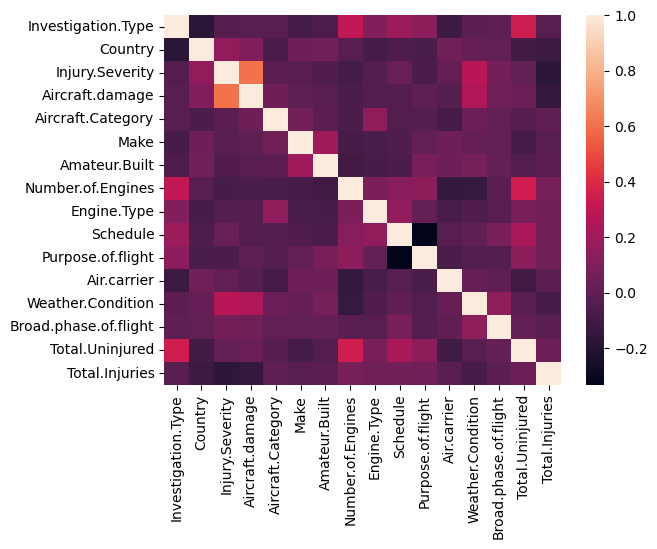

In [84]:
# data.corr()
sns.heatmap(data.corr())

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [71]:

X = data.drop(columns='Investigation.Type')
y = data['Investigation.Type']


In [72]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [73]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


In [74]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [75]:
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)


In [76]:

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9915701341897006


In [85]:

X = data.drop(columns='Injury.Severity')
y = data['Injury.Severity']


In [86]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [87]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


In [88]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [89]:
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)


In [90]:

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8988416102764079


In [238]:
df['Country'].unique()

array(['United States', nan, 'GULF OF MEXICO', 'Puerto Rico',
       'ATLANTIC OCEAN', 'HIGH ISLAND', 'Bahamas', 'MISSING', 'Pakistan',
       'Angola', 'Germany', 'Korea, Republic Of', 'Martinique',
       'American Samoa', 'PACIFIC OCEAN', 'Canada', 'Bolivia', 'Mexico',
       'Dominica', 'Netherlands Antilles', 'Iceland', 'Greece', 'Guam',
       'Australia', 'CARIBBEAN SEA', 'West Indies', 'Japan',
       'Philippines', 'Venezuela', 'Bermuda', 'San Juan Islands',
       'Colombia', 'El Salvador', 'United Kingdom',
       'British Virgin Islands', 'Netherlands', 'Costa Rica',
       'Mozambique', 'Jamaica', 'Panama', 'Guyana', 'Norway', 'Hong Kong',
       'Portugal', 'Malaysia', 'Turks And Caicos Islands',
       'Northern Mariana Islands', 'Dominican Republic', 'Suriname',
       'Honduras', 'Congo', 'Belize', 'Guatemala', 'Anguilla', 'France',
       'St Vincent And The Grenadines', 'Haiti', 'Montserrat',
       'Papua New Guinea', 'Cayman Islands', 'Sweden', 'Taiwan',
       'Se

In [ ]:
print(data['Air.carrier'].unique())

[nan 'Air Canada' 'Rocky Mountain Helicopters, In' ...
 'Helidosa Aviation Group SA' 'Fox Two, LLC' 'ExecAir']


In [ ]:
data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [ ]:
data_filtered.head()

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [177]:
test_df = data[['Investigation.Type', 'Location', 'Country',   'Aircraft.damage', 'Aircraft.Category', 'Make', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries','Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight']]

In [178]:
test_df.head()

,Investigation.Type,Location,Country,Aircraft.damage,Aircraft.Category,Make,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,Accident,"MOOSE CREEK, ID",United States,Destroyed,NaN,Stinson,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,Accident,"BRIDGEPORT, CA",United States,Destroyed,NaN,Piper,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,Accident,"Saltville, VA",United States,Destroyed,NaN,Cessna,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise
3,Accident,"EUREKA, CA",United States,Destroyed,NaN,Rockwell,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
4,Accident,"Canton, OH",United States,Destroyed,NaN,Cessna,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach


In [179]:
test_df.isna().sum()

Investigation.Type            0
Location                     52
Country                     226
Aircraft.damage            3010
Aircraft.Category         56499
Make                         63
Amateur.Built               102
Number.of.Engines          5749
Engine.Type                5910
Purpose.of.flight          5789
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          3978
Broad.phase.of.flight     25558
dtype: int64

In [180]:
unique = test_df['Investigation.Type'].unique()
unique_num = len(unique)
print(unique_num)

2


In [212]:
categorical_cols = []

for col in test_df.columns:
    unique_values = test_df[col].unique()
    if len(unique_values)<20:
        categorical_cols.append(col)
print(categorical_cols)


['Investigation.Type', 'Aircraft.damage', 'Aircraft.Category', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'Weather.Condition', 'Broad.phase.of.flight']


In [216]:
test_df[categorical_cols]

,Investigation.Type,Aircraft.damage,Aircraft.Category,Amateur.Built,Number.of.Engines,Engine.Type,Weather.Condition,Broad.phase.of.flight
0,Accident,Destroyed,NaN,N,1.0,Reciprocating,UNK,Cruise
1,Accident,Destroyed,NaN,N,1.0,Reciprocating,UNK,Unknown
2,Accident,Destroyed,NaN,N,1.0,Reciprocating,IMC,Cruise
3,Accident,Destroyed,NaN,N,1.0,Reciprocating,IMC,Cruise
4,Accident,Destroyed,NaN,N,NaN,NaN,VMC,Approach
...,...,...,...,...,...,...,...,...
87277,Accident,Destroyed,Airplane,N,1.0,NaN,NaN,NaN
87278,Accident,NaN,NaN,N,NaN,NaN,NaN,NaN
87279,Accident,NaN,NaN,N,NaN,NaN,NaN,NaN
87280,Accident,NaN,NaN,N,NaN,NaN,NaN,NaN


In [217]:
for col in categorical_cols:
    print(f'Unique values in {col}',test_df[col].unique())
    print(f'number of Null values in {col} ', test_df[col].isna().sum())
    print('\n')

Unique values in Investigation.Type ['Accident' 'Incident']
number of Null values in Investigation.Type  0


Unique values in Aircraft.damage ['Destroyed' 'Substantial' 'Minor' nan 'Unknown']
number of Null values in Aircraft.damage  3010


Unique values in Aircraft.Category [nan 'Airplane' 'Helicopter' 'Glider' 'Balloon' 'Gyrocraft' 'Ultralight'
 'Unknown' 'Blimp' 'Powered-Lift' 'Weight-Shift' 'Powered Parachute'
 'Rocket']
number of Null values in Aircraft.Category  56499


Unique values in Amateur.Built ['N' 'Y' nan]
number of Null values in Amateur.Built  102


Unique values in Number.of.Engines [ 1. nan  2.  0.  3.  4.  8.]
number of Null values in Number.of.Engines  5749


Unique values in Engine.Type ['Reciprocating' nan 'Turbo Fan' 'Turbo Shaft' 'Unknown' 'Turbo Prop'
 'Turbo Jet' 'Electric' 'Hybrid Rocket' 'Geared Turbofan' 'LR']
number of Null values in Engine.Type  5910


Unique values in Weather.Condition ['UNK' 'IMC' 'VMC' nan 'Unk']
number of Null values in Weather.Condit

In [218]:
test_df['Amateur.Built'] = test_df['Amateur.Built'].replace({'Yes': 'Y', 'No': 'N'})


/tmp/ipykernel_8643/914295451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Amateur.Built'] = test_df['Amateur.Built'].replace({'Yes': 'Y', 'No': 'N'})


In [219]:
test_df.shape

(87282, 16)

In [220]:
for col in categorical_cols:
    print(f'Unique values in {col}',test_df[col].unique())
    print(f'number of Null values in {col} ', test_df[col].isna().sum())
    print('\n')

Unique values in Investigation.Type ['Accident' 'Incident']
number of Null values in Investigation.Type  0


Unique values in Aircraft.damage ['Destroyed' 'Substantial' 'Minor' nan 'Unknown']
number of Null values in Aircraft.damage  3010


Unique values in Aircraft.Category [nan 'Airplane' 'Helicopter' 'Glider' 'Balloon' 'Gyrocraft' 'Ultralight'
 'Unknown' 'Blimp' 'Powered-Lift' 'Weight-Shift' 'Powered Parachute'
 'Rocket']
number of Null values in Aircraft.Category  56499


Unique values in Amateur.Built ['N' 'Y' nan]
number of Null values in Amateur.Built  102


Unique values in Number.of.Engines [ 1. nan  2.  0.  3.  4.  8.]
number of Null values in Number.of.Engines  5749


Unique values in Engine.Type ['Reciprocating' nan 'Turbo Fan' 'Turbo Shaft' 'Unknown' 'Turbo Prop'
 'Turbo Jet' 'Electric' 'Hybrid Rocket' 'Geared Turbofan' 'LR']
number of Null values in Engine.Type  5910


Unique values in Weather.Condition ['UNK' 'IMC' 'VMC' nan 'Unk']
number of Null values in Weather.Condit

In [221]:
def impute_null_with_mode(df):
    for column in df.columns:
        mode_val = df[column].mode()[0]  # Calculate the mode for each column
        df[column].fillna(mode_val, inplace=True)  # Fill null values with the mode
    return df

In [188]:
imputed_df = impute_null_with_mode(test_df[categorical_cols])

/tmp/ipykernel_8643/1529948284.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_val, inplace=True)  # Fill null values with the mode
/tmp/ipykernel_8643/1529948284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].fillna(mode_val, inplace=True)  # Fill null values with the mode


In [189]:
imputed_df.isna().sum()

Investigation.Type    0
Aircraft.damage       0
Amateur.Built         0
Number.of.Engines     0
Weather.Condition     0
dtype: int64

In [193]:
numerical_cols = test_df.drop(columns=categorical_cols)

In [194]:
numerical_cols.head()

,Location,Country,Aircraft.Category,Make,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Broad.phase.of.flight
0,"MOOSE CREEK, ID",United States,NaN,Stinson,Reciprocating,Personal,2.0,0.0,0.0,0.0,Cruise
1,"BRIDGEPORT, CA",United States,NaN,Piper,Reciprocating,Personal,4.0,0.0,0.0,0.0,Unknown
2,"Saltville, VA",United States,NaN,Cessna,Reciprocating,Personal,3.0,NaN,NaN,NaN,Cruise
3,"EUREKA, CA",United States,NaN,Rockwell,Reciprocating,Personal,2.0,0.0,0.0,0.0,Cruise
4,"Canton, OH",United States,NaN,Cessna,NaN,Personal,1.0,2.0,NaN,0.0,Approach


In [195]:
numerical_cols.isna().sum()

Location                     52
Country                     226
Aircraft.Category         56499
Make                         63
Engine.Type                5910
Purpose.of.flight          5789
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Broad.phase.of.flight     25558
dtype: int64

In [211]:
numerical_cols['Aircraft.Category'].unique()



array([nan, 'Airplane', 'Helicopter', 'Glider', 'Balloon', 'Gyrocraft',
       'Ultralight', 'Unknown', 'Blimp', 'Powered-Lift', 'Weight-Shift',
       'Powered Parachute', 'Rocket'], dtype=object)

In [ ]:
to_append_in_categorical = ['Aircraft.Category', 'Engine.Type', 'Purpose.of.flight', 'Broad.phase.of.flight']

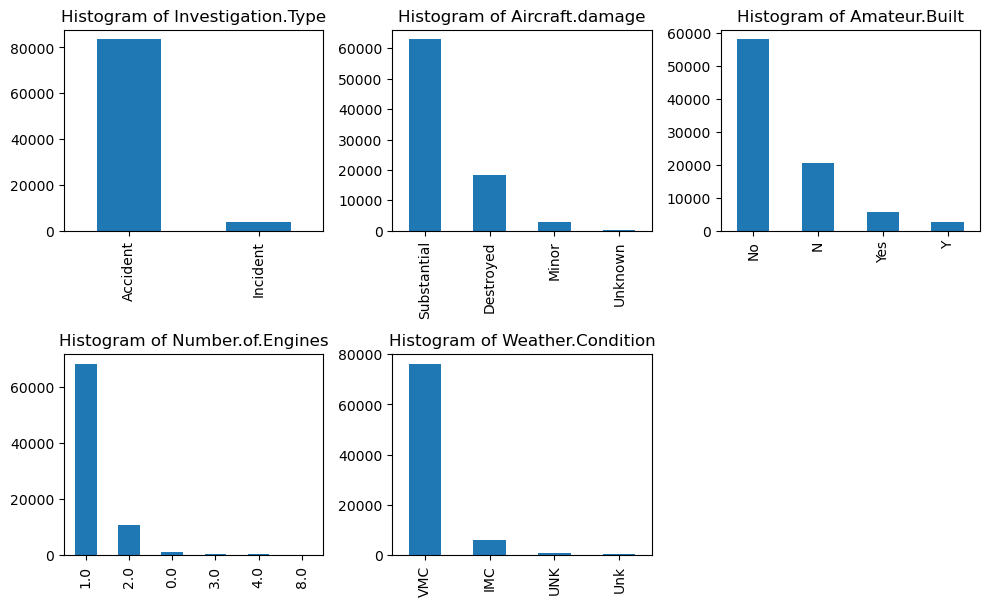

In [209]:
columns_per_row = 3

num_cols = 5
num_rows = 3

fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(10, 3 * num_rows))
for i, col in enumerate(categorical_cols):
    ax = axes[i // columns_per_row, i % columns_per_row]
    data[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('')

for i in range(num_cols, num_rows * columns_per_row):
    fig.delaxes(axes.flatten()[i])

    
plt.tight_layout()
plt.show()